<a href="https://colab.research.google.com/github/IsaiasMartinezF/Redes-Neuronales-/blob/main/guardado_de_archivos_redes_visualizacion_de_se%C3%B1as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/sign-language-img.zip \
    -O /tmp/sign-language-img.zip

--2023-01-27 14:25:18--  https://storage.googleapis.com/platzi-tf2/sign-language-img.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.250.145.128, 2a00:1450:4013:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24265584 (23M) [application/zip]
Saving to: ‘/tmp/sign-language-img.zip’

/tmp/sign-language- 100%[===================>]  23.14M  12.2MB/s    in 1.9s    

2023-01-27 14:25:21 (12.2 MB/s) - ‘/tmp/sign-language-img.zip’ saved [24265584/24265584]



In [ ]:
import os
import zipfile

local_zip = "/tmp/sign-language-img.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/sign-language-img')
zip_ref.close()

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mping
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir ='/tmp/sign-language-img/Train'
test_dir = '/tmp/sign-language-img/Test'

In [ ]:
#vamos a normalizar los datos
train_datagen = ImageDataGenerator(rescale =1/255)
test_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= (28,28),
    batch_size = 128,
    class_mode ='categorical',
    color_mode ='grayscale',
    subset ='training'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size= (28,28),
    batch_size = 128,
    class_mode ='categorical',
    color_mode ='grayscale',
    subset ='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size= (28,28),
    batch_size = 128,
    class_mode ='categorical',
    color_mode ='grayscale'
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [ ]:
classes = [char for char in string.ascii_uppercase if char != 'J' if char !='Z']

In [ ]:
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,5, figsize = (10,10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis('off')
  plt.tight_layout()
  plt.show()  

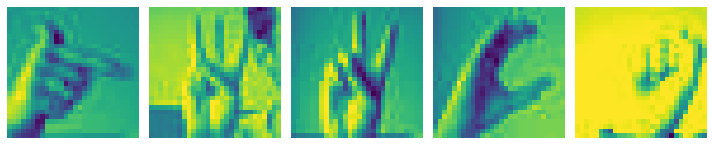

In [ ]:
sample_trainig_images, _= next(train_generator)
plotImages(sample_trainig_images[:5])

In [ ]:
#sequencial nos permite que las capas de la red neuronal se vayan relacionando de mnera secuencial
model_base = tf.keras.models.Sequential([
    #la primer capa es la entrada de nuestra red n. Flaten hace la imagen en un array
    tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
    #capa densa de activacion relu con 256 neuronas
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    #capa de salida va a tener la misma cantidad de neuronas que de clases de salida
    #con una funcion de activacion 'softmax' va a dividir la probabilidad de 0 a 100 segun las clases
    tf.keras.layers.Dense(len(classes), activation = 'softmax')

])

In [ ]:
#veamos la arquitectura del modelo
model_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 24)                3096      
                                                                 
Total params: 236,952
Trainable params: 236,952
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compilemos el modelo y optimizemos con adam 
model_base.compile(optimizer= 'adam', loss ='categorical_crossentropy', metrics =['accuracy'])

history = model_base.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 10s 34ms/step - loss: 2.1332 - accuracy: 0.3627 - val_loss: 1.6698 - val_accuracy: 0.4968
Epoch 2/20
215/215 [==============================] - 7s 32ms/step - loss: 1.2201 - accuracy: 0.6291 - val_loss: 1.3808 - val_accuracy: 0.5923
Epoch 3/20
215/215 [==============================] - 7s 32ms/step - loss: 0.8879 - accuracy: 0.7278 - val_loss: 1.1778 - val_accuracy: 0.6379
Epoch 4/20
215/215 [==============================] - 7s 31ms/step - loss: 0.6665 - accuracy: 0.7982 - val_loss: 1.1227 - val_accuracy: 0.6618
Epoch 5/20
215/215 [==============================] - 7s 32ms/step - loss: 0.5078 - accuracy: 0.8527 - val_loss: 1.0455 - val_accuracy: 0.6800
Epoch 6/20
215/215 [==============================] - 7s 32ms/step - loss: 0.3806 - accuracy: 0.8953 - val_loss: 0.9768 - val_accuracy: 0.7018
Epoch 7/20
215/215 [==============================] - 7s 34ms/step - loss: 0.2930 - accuracy: 0.9225 - val_loss: 1.0297 - val_accuracy: 0.726

In [ ]:
results = model_base.evaluate(test_generator)

57/57 [==============================] - 2s 31ms/step - loss: 1.1743 - accuracy: 0.7856


In [ ]:
#creando una visualizacion con una funcion continua. 
#como fue la curva de aprendizaje , por medio de las epocas
#se usaran dos graficas: la primera se vera la precicion en el entrenamiento
#ademas se usara el training loss y la validacion
def visualizacion_resultados(history):
  epochs = [i for i in range(20)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history['accuracy']
  train_loss = history.history['loss']
  val_acc = history.history['val_accuracy']
  val_loss = history.history['val_loss']
  fig.set_size_inches(16,9)

  ax[0].plot(epochs,train_acc,'go-', label= 'Entrenamiento accuracy')
  ax[0].plot(epochs, val_acc, 'ro-', label= 'Validation accuracy')
  ax[0].set_title('Entrenamiento & validation accuracy')
  ax[0].legend()
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Accuracy')

  ax[1].plot(epochs,train_loss,'go-', label= 'Entrenamiento loss')
  ax[1].plot(epochs, val_loss, 'ro-', label= 'Validation loss')
  ax[1].set_title('Entrenamiento & validation loss')
  ax[1].legend()
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Loss')

  plt.show()




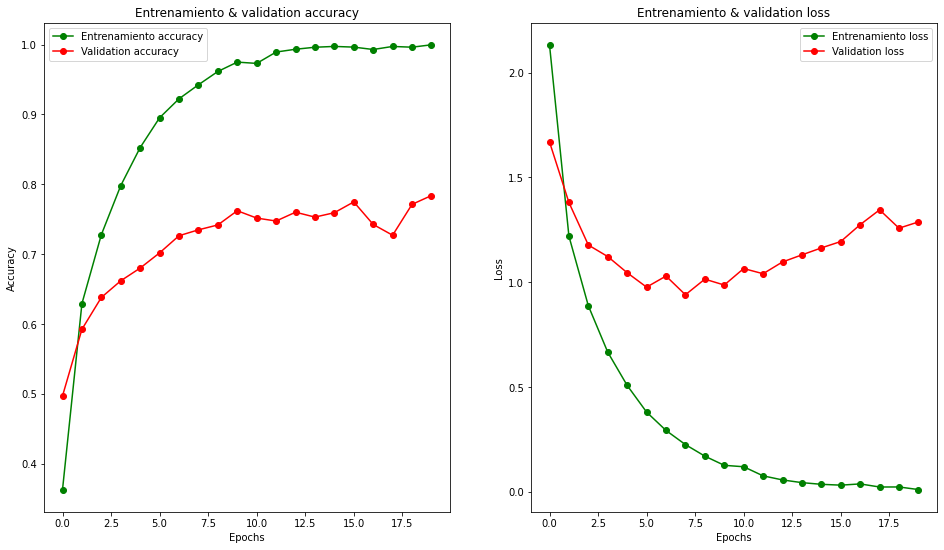

In [ ]:
visualizacion_resultados(history)

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
#Vamos a aplicar regularizadores sobre la misma arquitectura 
model_optimizer = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
    #vamos a aplicar los regularizadores en esta capa 'kernel_regularizer'
    tf.keras.layers.Dense(256, kernel_regularizer= regularizers.l2(1e-5) ,activation = 'relu'),
    #vamos a poner una capa de dropout
    tf.keras.layers.Dropout(0.2),
    #otro regularizer
    tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5) ,activation = 'relu'),
    #otro dropout
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(classes), activation = 'softmax')

])

model_optimizer.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 24)                3096      
                                                                 
Total params: 236,952
Trainable params: 236,952
Non-tr

In [ ]:
model_optimizer.compile(optimizer= 'adam', loss ='categorical_crossentropy', metrics =['accuracy'])

history_optimizer = model_optimizer.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 8s 33ms/step - loss: 2.4702 - accuracy: 0.2431 - val_loss: 1.7483 - val_accuracy: 0.4877
Epoch 2/20
215/215 [==============================] - 7s 31ms/step - loss: 1.5572 - accuracy: 0.4895 - val_loss: 1.3692 - val_accuracy: 0.5775
Epoch 3/20
215/215 [==============================] - 7s 33ms/step - loss: 1.1713 - accuracy: 0.6088 - val_loss: 1.2104 - val_accuracy: 0.6021
Epoch 4/20
215/215 [==============================] - 7s 32ms/step - loss: 0.9367 - accuracy: 0.6833 - val_loss: 1.0110 - val_accuracy: 0.6744
Epoch 5/20
215/215 [==============================] - 7s 32ms/step - loss: 0.7749 - accuracy: 0.7410 - val_loss: 0.9359 - val_accuracy: 0.6926
Epoch 6/20
215/215 [==============================] - 7s 32ms/step - loss: 0.6611 - accuracy: 0.7772 - val_loss: 0.9562 - val_accuracy: 0.6870
Epoch 7/20
215/215 [==============================] - 7s 32ms/step - loss: 0.5619 - accuracy: 0.8093 - val_loss: 0.8819 - val_accuracy: 0.7214

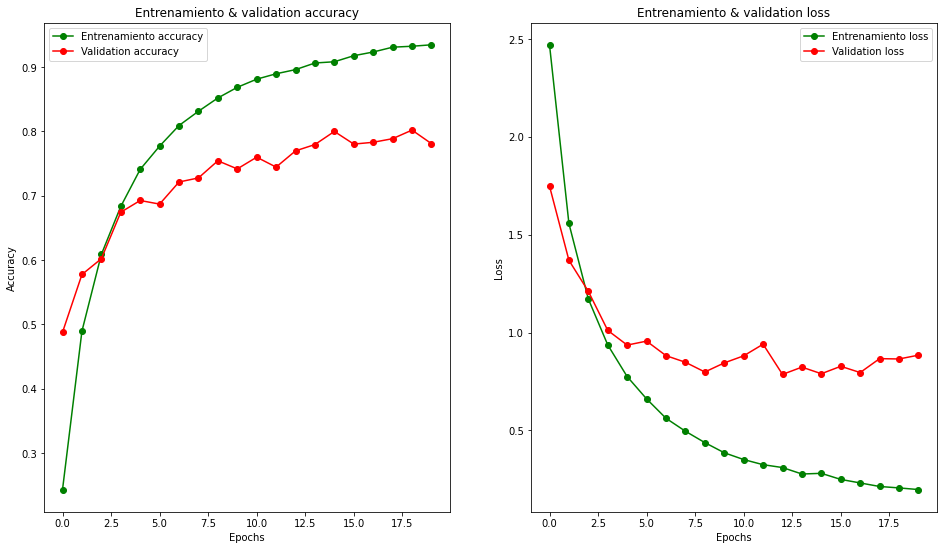

In [ ]:
visualizacion_resultados(history_optimizer)

##Recomendaciones:
Preprocesamiento: buscar datos nulos, aplicar normalizacion, ver la cantidad de datos, visualizar la base de datos. \n
Variables (como iniciar los parametros): 
Convoluciones (3x3), Pooling (2x2), Flatten (imágenes), Neuronas (68, 128, 256, 512), Learning Rate (0.001)ADAM, L1_2(1e-5), Dropout. \n 
Recomendaciones de funciones de activacion:
multi clases: softmax, binarios: sigmoidal, regresiones: funcion lineal, Clases predicciones mayor que 0: RelU.



In [ ]:
#hagamos un modelo convulucional
model_convolutional = tf.keras.models.Sequential([
    #agreguemos una capa convolucional
    tf.keras.layers.Conv2D(75, (3,3), activation= 'relu', input_shape = (28, 28, 1)),#multiplos 25
    #agreguemos la reduccion de dimencionalidad
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, kernel_regularizer= regularizers.l2(1e-5) ,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5) ,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(classes), activation = 'softmax')

])

model_convolutional.summary()

model_convolutional.compile(optimizer= 'adam', loss ='categorical_crossentropy', metrics =['accuracy'])

history_convolutional = model_convolutional.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 75)       0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 12675)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               3245056   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                      

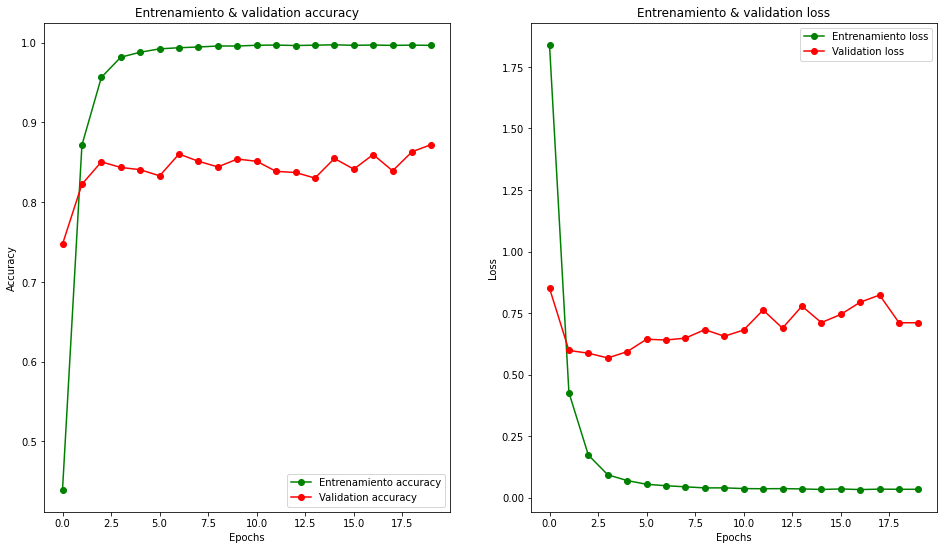

In [ ]:
visualizacion_resultados(history_convolutional)

In [ ]:
#Usemos callbacks 
model_callback = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(75, (3,3), activation= 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, kernel_regularizer= regularizers.l2(1e-5) ,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5) ,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(classes), activation = 'softmax')

])

model_callback.summary()

model_callback.compile(optimizer= 'adam', loss ='categorical_crossentropy', metrics =['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 75)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 12675)             0         
                                                                 
 dense_9 (Dense)             (None, 256)               3245056   
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                      

In [ ]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_epoch_end(self, epoch, logs ={}):
    if logs.get('accuracy')>0.95:
      print('Lo logramos, nuestro modelo llego a 95%; detenemos el entrenamiento')
      self.model.stop_training = True


In [ ]:
callback = TrainingCallback()

history_callback = model_callback.fit(
    train_generator,
    epochs = 20,
    callbacks =[callback],
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 9s 39ms/step - loss: 1.5248 - accuracy: 0.5440 - val_loss: 0.7623 - val_accuracy: 0.7600
Epoch 2/20
215/215 [==============================] - 7s 34ms/step - loss: 0.2989 - accuracy: 0.9155 - val_loss: 0.5643 - val_accuracy: 0.8330
Epoch 3/20
215/215 [==============================] - 9s 40ms/step - loss: 0.1124 - accuracy: 0.9778 - val_loss: 0.5831 - val_accuracy: 0.8302


In [ ]:
def get_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(75, (3,3), activation= 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, kernel_regularizer= regularizers.l2(1e-5) ,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5) ,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(classes), activation = 'softmax')

  ])
  return model

#Vamos a usar el earlystoping 

model_early = get_model()
model_early.summary()

model_early.compile(optimizer= 'adam', loss ='categorical_crossentropy', metrics =['accuracy'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 75)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 12675)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               3245056   
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                      

In [ ]:
#importaremos el earlystoping de tensor y lo vamos a configurar
#'monitor' es la metricas a la cual se va a vigilar
#'patience' va a vigilar las perdidas y si las perdidas no disminuyen lo va a parar pues ya no esta entrenando
#'mode'  puede medir loss (con el min) o accuracy (con el max)
callback_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience= 3, mode='auto')

In [ ]:
history_early = model_early.fit(
    train_generator,
    epochs = 20,
    callbacks =[callback_early],
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 9s 39ms/step - loss: 1.5646 - accuracy: 0.5302 - val_loss: 0.7719 - val_accuracy: 0.7270
Epoch 2/20
215/215 [==============================] - 9s 40ms/step - loss: 0.3148 - accuracy: 0.9108 - val_loss: 0.5454 - val_accuracy: 0.8232
Epoch 3/20
215/215 [==============================] - 10s 47ms/step - loss: 0.1184 - accuracy: 0.9762 - val_loss: 0.5862 - val_accuracy: 0.8295
Epoch 4/20
215/215 [==============================] - 9s 40ms/step - loss: 0.0694 - accuracy: 0.9892 - val_loss: 0.6446 - val_accuracy: 0.8337
Epoch 5/20
215/215 [==============================] - 9s 44ms/step - loss: 0.0527 - accuracy: 0.9936 - val_loss: 0.6287 - val_accuracy: 0.8470
Epoch 6/20
215/215 [==============================] - 9s 42ms/step - loss: 0.0436 - accuracy: 0.9954 - val_loss: 0.6293 - val_accuracy: 0.8386
Epoch 7/20
215/215 [==============================] - 7s 35ms/step - loss: 0.0388 - accuracy: 0.9964 - val_loss: 0.6347 - val_accuracy: 0.848

In [ ]:
#vamos a guardar el modelo (solo la arquitectura)
config_dict = model_early.get_config()

In [ ]:
print(config_dict)

{'name': 'sequential_4', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 28, 28, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'conv2d_2_input'}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d_2', 'trainable': True, 'batch_input_shape': (None, 28, 28, 1), 'dtype': 'float32', 'filters': 75, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_2', 'trainable': True, 'dtype': 'float32', 'pool_size': (2, 2), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'}}, 

In [ ]:
#vamos a cargar la arquitectura sin pesos
model_same_config = tf.keras.Sequential.from_config(config_dict)

In [ ]:
#visualicemos el modelo
model_same_config.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 75)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 12675)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               3245056   
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                      

In [ ]:
#ahora vamos a aprender como guardar los pesos
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
#ocuparemos una de las funciones ya hechas del modelo y lo vamos a cargar
model_weight = get_model()
model_weight.summary()
model_weight.compile(optimizer= 'adam', loss ='categorical_crossentropy', metrics =['accuracy'])


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 75)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 12675)             0         
                                                                 
 dense_21 (Dense)            (None, 256)               3245056   
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                      

In [ ]:
checkpoint_path = 'model_checkpoints/checkpoint'
checkpoint_weighs = ModelCheckpoint(
    filepath = checkpoint_path,
    frecuency = 'epoch',
    save_weights_only =True,
    verbose = 1
)

In [ ]:
history_weight = model_weight.fit(
    train_generator,
    epochs=20,
    callbacks = [checkpoint_weighs],
    validation_data = validation_generator
)

Epoch 1/20
214/215 [============================>.] - ETA: 0s - loss: 1.6474 - accuracy: 0.5037
Epoch 1: saving model to model_checkpoints/checkpoint
215/215 [==============================] - 9s 40ms/step - loss: 1.6430 - accuracy: 0.5051 - val_loss: 0.7426 - val_accuracy: 0.7551
Epoch 2/20
214/215 [============================>.] - ETA: 0s - loss: 0.3522 - accuracy: 0.8963
Epoch 2: saving model to model_checkpoints/checkpoint
215/215 [==============================] - 7s 34ms/step - loss: 0.3514 - accuracy: 0.8965 - val_loss: 0.5564 - val_accuracy: 0.8196
Epoch 3/20
215/215 [==============================] - ETA: 0s - loss: 0.1348 - accuracy: 0.9708
Epoch 3: saving model to model_checkpoints/checkpoint
215/215 [==============================] - 8s 35ms/step - loss: 0.1348 - accuracy: 0.9708 - val_loss: 0.5559 - val_accuracy: 0.8379
Epoch 4/20
214/215 [============================>.] - ETA: 0s - loss: 0.0781 - accuracy: 0.9872
Epoch 4: saving model to model_checkpoints/checkpoint
215/

In [ ]:
#vamos a salvar los pesos de manera manual
#solo guarda la  ultima configuracion
model_weight.save_weights('model_manul/my_model')

In [ ]:
#vamos a cargar  el modelo
model_weights2 =get_model()
model_weights2.compile(optimizer= 'adam', loss ='categorical_crossentropy', metrics =['accuracy'])

In [ ]:
#vamos a carcar los pesos
model_weights2.load_weights(checkpoint_path)

In [ ]:
model_weights2.evaluate(test_generator)

57/57 [==============================] - 2s 31ms/step - loss: 0.8200 - accuracy: 0.8632


[0.8200177550315857, 0.8632180690765381]

In [ ]:
model_weight.evaluate(test_generator)

57/57 [==============================] - 2s 31ms/step - loss: 0.8200 - accuracy: 0.8632


[0.8200176954269409, 0.8632180690765381]

In [ ]:
#ahora al macenaremos el mejor modelo y pesos
checkpoint_path = 'model_checkpoints_complete'
checkpoint_weighs = ModelCheckpoint(
    filepath = checkpoint_path,
    frecuency = 'epoch',
    #aqui es donde estamos modificando
    save_weights_only =False,
    monitor='val_accuracy',
    save_best_only =True,
    verbose = 1
)

In [ ]:
model_complete =get_model()
model_complete.compile(optimizer= 'adam', loss ='categorical_crossentropy', metrics =['accuracy'])

In [ ]:
history_complete = model_complete.fit(
    train_generator,
    epochs=20,
    callbacks = [checkpoint_weighs],
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - ETA: 0s - loss: 1.6717 - accuracy: 0.4923
Epoch 1: val_accuracy improved from -inf to 0.74526, saving model to model_checkpoints_complete


215/215 [==============================] - 9s 41ms/step - loss: 1.6717 - accuracy: 0.4923 - val_loss: 0.8211 - val_accuracy: 0.7453
Epoch 2/20
214/215 [============================>.] - ETA: 0s - loss: 0.3823 - accuracy: 0.8860
Epoch 2: val_accuracy improved from 0.74526 to 0.81123, saving model to model_checkpoints_complete


215/215 [==============================] - 8s 38ms/step - loss: 0.3815 - accuracy: 0.8863 - val_loss: 0.5700 - val_accuracy: 0.8112
Epoch 3/20
214/215 [============================>.] - ETA: 0s - loss: 0.1515 - accuracy: 0.9641
Epoch 3: val_accuracy improved from 0.81123 to 0.83298, saving model to model_checkpoints_complete


215/215 [==============================] - 8s 38ms/step - loss: 0.1514 - accuracy: 0.9641 - val_loss: 0.5480 - val_accuracy: 0.8330
Epoch 4/20
214/215 [============================>.] - ETA: 0s - loss: 0.0884 - accuracy: 0.9828
Epoch 4: val_accuracy improved from 0.83298 to 0.84211, saving model to model_checkpoints_complete


215/215 [==============================] - 8s 37ms/step - loss: 0.0884 - accuracy: 0.9828 - val_loss: 0.5710 - val_accuracy: 0.8421
Epoch 5/20
214/215 [============================>.] - ETA: 0s - loss: 0.0629 - accuracy: 0.9898
Epoch 5: val_accuracy improved from 0.84211 to 0.84281, saving model to model_checkpoints_complete


215/215 [==============================] - 8s 38ms/step - loss: 0.0628 - accuracy: 0.9899 - val_loss: 0.6196 - val_accuracy: 0.8428
Epoch 6/20
214/215 [============================>.] - ETA: 0s - loss: 0.0514 - accuracy: 0.9929
Epoch 6: val_accuracy did not improve from 0.84281
215/215 [==============================] - 7s 34ms/step - loss: 0.0514 - accuracy: 0.9929 - val_loss: 0.6400 - val_accuracy: 0.8421
Epoch 7/20
214/215 [============================>.] - ETA: 0s - loss: 0.0473 - accuracy: 0.9940
Epoch 7: val_accuracy did not improve from 0.84281
215/215 [==============================] - 7s 33ms/step - loss: 0.0472 - accuracy: 0.9940 - val_loss: 0.6563 - val_accuracy: 0.8414
Epoch 8/20
214/215 [============================>.] - ETA: 0s - loss: 0.0418 - accuracy: 0.9956
Epoch 8: val_accuracy improved from 0.84281 to 0.85544, saving model to model_checkpoints_complete


215/215 [==============================] - 8s 37ms/step - loss: 0.0418 - accuracy: 0.9956 - val_loss: 0.6845 - val_accuracy: 0.8554
Epoch 9/20
215/215 [==============================] - ETA: 0s - loss: 0.0389 - accuracy: 0.9962
Epoch 9: val_accuracy did not improve from 0.85544
215/215 [==============================] - 8s 35ms/step - loss: 0.0389 - accuracy: 0.9962 - val_loss: 0.6861 - val_accuracy: 0.8505
Epoch 10/20
215/215 [==============================] - ETA: 0s - loss: 0.0371 - accuracy: 0.9967
Epoch 10: val_accuracy did not improve from 0.85544
215/215 [==============================] - 7s 34ms/step - loss: 0.0371 - accuracy: 0.9967 - val_loss: 0.7351 - val_accuracy: 0.8498
Epoch 11/20
214/215 [============================>.] - ETA: 0s - loss: 0.0385 - accuracy: 0.9958
Epoch 11: val_accuracy did not improve from 0.85544
215/215 [==============================] - 7s 34ms/step - loss: 0.0385 - accuracy: 0.9958 - val_loss: 0.7536 - val_accuracy: 0.8498
Epoch 12/20
214/215 [======

215/215 [==============================] - 8s 39ms/step - loss: 0.0356 - accuracy: 0.9964 - val_loss: 0.7751 - val_accuracy: 0.8575
Epoch 15/20
215/215 [==============================] - ETA: 0s - loss: 0.0341 - accuracy: 0.9968
Epoch 15: val_accuracy improved from 0.85754 to 0.85965, saving model to model_checkpoints_complete


215/215 [==============================] - 9s 41ms/step - loss: 0.0341 - accuracy: 0.9968 - val_loss: 0.8397 - val_accuracy: 0.8596
Epoch 16/20
214/215 [============================>.] - ETA: 0s - loss: 0.0334 - accuracy: 0.9973
Epoch 16: val_accuracy did not improve from 0.85965
215/215 [==============================] - 8s 38ms/step - loss: 0.0334 - accuracy: 0.9973 - val_loss: 0.7415 - val_accuracy: 0.8589
Epoch 17/20
214/215 [============================>.] - ETA: 0s - loss: 0.0333 - accuracy: 0.9976
Epoch 17: val_accuracy did not improve from 0.85965
215/215 [==============================] - 8s 36ms/step - loss: 0.0333 - accuracy: 0.9976 - val_loss: 0.8783 - val_accuracy: 0.8400
Epoch 18/20
215/215 [==============================] - ETA: 0s - loss: 0.0334 - accuracy: 0.9970
Epoch 18: val_accuracy did not improve from 0.85965
215/215 [==============================] - 8s 38ms/step - loss: 0.0334 - accuracy: 0.9970 - val_loss: 0.7848 - val_accuracy: 0.8547
Epoch 19/20
214/215 [====

215/215 [==============================] - 9s 44ms/step - loss: 0.0345 - accuracy: 0.9969 - val_loss: 0.7538 - val_accuracy: 0.8772
Epoch 20/20
214/215 [============================>.] - ETA: 0s - loss: 0.0304 - accuracy: 0.9980
Epoch 20: val_accuracy did not improve from 0.87719
215/215 [==============================] - 8s 39ms/step - loss: 0.0304 - accuracy: 0.9980 - val_loss: 0.8028 - val_accuracy: 0.8533


In [ ]:
#ahora vamos a guardar el modelo de manera normal
model_complete.save('save_model_complete/mymodel')

In [ ]:
#ahora vamos a cargar el modelo
model_complete3 = tf.keras.models.load_model('save_model_complete/mymodel')

In [ ]:
#veamos que si es el modelo 
model_complete3.evaluate(test_generator)

57/57 [==============================] - 2s 30ms/step - loss: 0.7526 - accuracy: 0.8575


[0.7525725364685059, 0.8575013875961304]

In [ ]:
#ahora ocuparemos otro formato para guardar
#el h5
!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#despues de haber descargado las librerias ahora guardamos el modelo
model_complete3.save('my_model.h5')

In [ ]:
#ahora lo vamos a cargar
model_complete3 = tf.keras.models.load_model('my_model.h5')

In [ ]:
model_complete3.evaluate(test_generator)

57/57 [==============================] - 2s 30ms/step - loss: 0.7526 - accuracy: 0.8575


[0.7525724768638611, 0.8575013875961304]